In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
Train=pd.read_csv('train.csv')

In [9]:
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
#missing values
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Remove unwanted columns
Train=Train.drop(columns=['Cabin','PassengerId','Name'])

In [12]:
#Drop missing values
Train.dropna(inplace=True)

In [13]:
Train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [14]:
Train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


<Axes: ylabel='Pclass'>

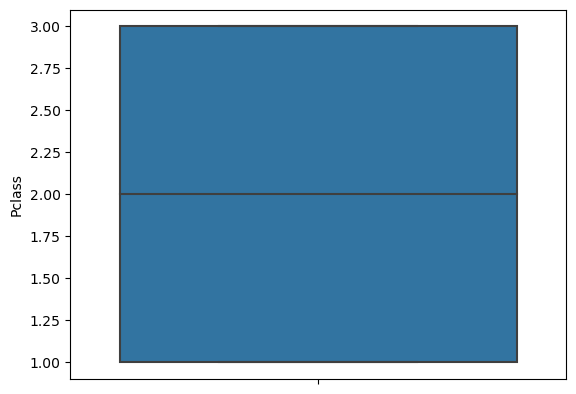

In [15]:
#Eliminate outliers
sns.boxplot(y='Pclass', data=Train)

In [16]:
lowerLimit = Train['Age'].quantile(0.00)
upperLimit = Train['Age'].quantile(0.97)
lowerLimit

0.42

In [17]:
upperLimit

60.0

In [18]:
Train['Age'] = Train['Age'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Age'>

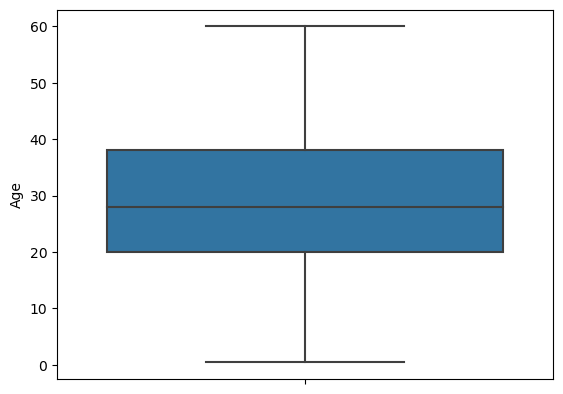

In [19]:
sns.boxplot(y='Age', data=Train)

In [20]:
lowerLimit = Train['SibSp'].quantile(0.00)
upperLimit = Train['SibSp'].quantile(0.87)
lowerLimit

0.0

In [21]:
upperLimit

1.0

In [22]:
Train['SibSp'] = Train['SibSp'].clip(lowerLimit, upperLimit)

<Axes: ylabel='SibSp'>

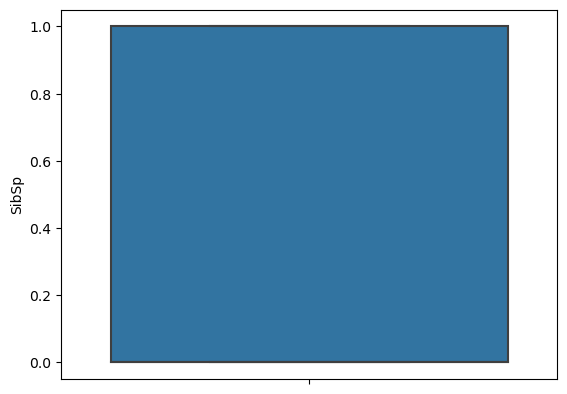

In [23]:
sns.boxplot(y='SibSp', data=Train)

In [24]:
lowerLimit = Train['Parch'].quantile(0.00)
upperLimit = Train['Parch'].quantile(0.90)
lowerLimit

0.0

In [25]:
upperLimit

2.0

In [26]:
Train['Parch'] = Train['Parch'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Parch'>

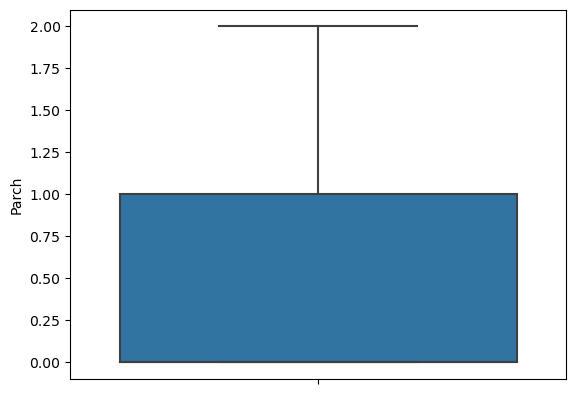

In [27]:
sns.boxplot(y='Parch', data=Train)

In [28]:
lowerLimit = Train['Fare'].quantile(0.00)
upperLimit = Train['Fare'].quantile(0.85)
lowerLimit

0.0

In [29]:
upperLimit

57.9792

In [30]:
Train['Fare'] = Train['Fare'].clip(lowerLimit, upperLimit)

<Axes: ylabel='Fare'>

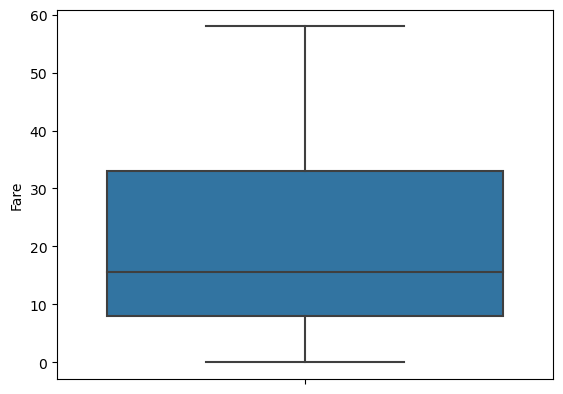

In [31]:
sns.boxplot(y='Fare', data=Train)

In [32]:
#To convert Categorical dataset to Numerical, we have to encode each column
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
Train['Sex'] = le.fit_transform(Train['Sex'])

In [35]:
Train['Ticket'] = le.fit_transform(Train['Ticket'])

In [36]:
Train['Embarked'] = le.fit_transform(Train['Embarked'])

In [37]:
Train.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [38]:
 X_train=Train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked']]

In [39]:
Y_train= Train ['Survived']

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [41]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [42]:
Testing=pd.read_csv('test.csv')

In [43]:
#To clean the test data
Testing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
Testing.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
#Drop missing values
Testing.dropna(inplace=True)

In [46]:
Testing.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
#Remove unwanted columns
Testing=Testing.drop(columns=['Cabin','PassengerId','Name'])

In [48]:
Testing.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [49]:
#To convert Categorical dataset to Numerical, we have to encode each column

In [50]:
Testing['Sex'] = le.fit_transform(Testing['Sex'])

In [51]:
Testing['Ticket'] = le.fit_transform(Testing['Ticket'])

In [52]:
Testing['Embarked'] = le.fit_transform(Testing['Embarked'])

In [53]:
Testing

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
12,1,0,23.0,1,0,32,82.2667,2
14,1,0,47.0,1,0,65,61.1750,2
24,1,0,48.0,1,3,53,262.3750,0
26,1,0,22.0,0,1,9,61.9792,0
28,1,1,41.0,0,0,7,30.5000,2
...,...,...,...,...,...,...,...,...
404,1,1,43.0,1,0,28,27.7208,0
405,2,1,20.0,0,0,63,13.8625,0
407,1,1,50.0,1,1,8,211.5000,0
411,1,0,37.0,1,0,30,90.0000,1


In [54]:
Testing.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], dtype='object')

In [55]:
test=Testing[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]

In [56]:
#So after training, you can now predict outputs using the model.
Y_pred = clf.predict(test)

In [57]:
Y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [58]:
#Shows how much influnce each imput as on the output
clf.feature_importances_

array([0.07389072, 0.22608445, 0.20528056, 0.0214067 , 0.03286567,
       0.23376135, 0.17868868, 0.02802188])

In [59]:
feature_scores = pd.Series(clf.feature_importances_, index=Testing.columns).sort_values(ascending=False)

In [60]:
feature_scores

Ticket      0.233761
Sex         0.226084
Age         0.205281
Fare        0.178689
Pclass      0.073891
Parch       0.032866
Embarked    0.028022
SibSp       0.021407
dtype: float64

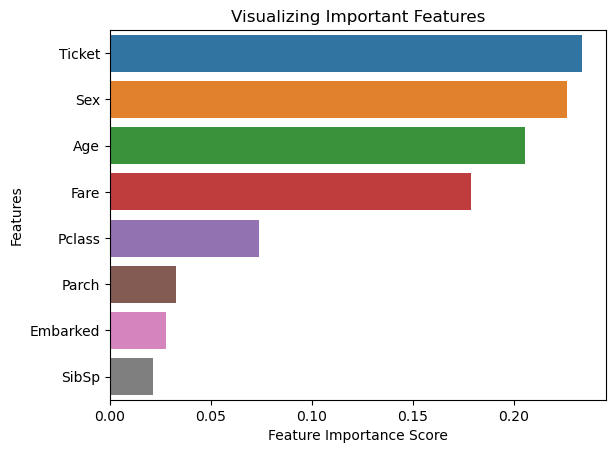

In [61]:
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# For Random Forest Model Evaluation

#As usual, we start by importing the GridSearchCV class like this below



In [62]:
from sklearn.model_selection import GridSearchCV

In [64]:
#For random forest, let's look at the hyperparameters that we have

In [65]:
param_grid = {
"n_estimators": range(10, 101, 10),
"max_depth": range(1,21),
"min_samples_split": range(1,11)
}



In [66]:
#Then we can now compile the GidSearch

from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')



In [67]:
#Then we can now pass the dataset to this GridSearch

grid_search.fit(X_train, Y_train)

C:\Users\visit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1000 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\visit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\visit\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\visit\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\visit\anaconda3\Lib\site-pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 21),
                         'min_samples_split': range(1, 11),
                         'n_estimators': range(10, 101, 10)},
             scoring='accuracy')

In [68]:
#We can now get the best hyperparameters like this below

best_params = grid_search.best_params_
print(best_params)

{'max_depth': 14, 'min_samples_split': 4, 'n_estimators': 20}


In [69]:
#We can now create a model from this GridSerach like this

best_model = grid_search.best_estimator_

In [71]:
#Then we can now use it to make predictions like this below

Z_pred = best_model.predict(test)



In [73]:
#To get the accuracy score of this hyper-parameter optimised model
best_score = grid_search.best_score_
best_score

0.8160642174726682

In [75]:
Y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [76]:
Z_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)